# AUTHORS

### Abhimanyu Borthakur (406530322)


### Lorenzo Bolls (505997448)


### Arthur Baghdasian (006001418)

# Imports and Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import PowerTransformer

import statsmodels.api as sm
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectKBest

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,make_scorer,r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
import random
np.random.seed(42)
random.seed(42)

In [3]:
df_diamonds = pd.read_csv("diamonds_ece219.csv")
print(df_diamonds.head())
df_diamonds.info()

   Unnamed: 0 color clarity  carat        cut   symmetry     polish  \
0           0     E    VVS2   0.09  Excellent  Very Good  Very Good   
1           1     E    VVS2   0.09  Very Good  Very Good  Very Good   
2           2     E    VVS2   0.09  Excellent  Very Good  Very Good   
3           3     E    VVS2   0.09  Excellent  Very Good  Very Good   
4           4     E    VVS2   0.09  Very Good  Very Good  Excellent   

   depth_percent  table_percent  length  width  depth girdle_min girdle_max  \
0           62.7           59.0    2.85   2.87   1.79          M          M   
1           61.9           59.0    2.84   2.89   1.78        STK        STK   
2           61.1           59.0    2.88   2.90   1.77         TN          M   
3           62.0           59.0    2.86   2.88   1.78          M        STK   
4           64.9           58.5    2.79   2.83   1.82        STK        STK   

   price  
0    200  
1    200  
2    200  
3    200  
4    200  
<class 'pandas.core.frame.DataFr

In [4]:
df_diamond = df_diamonds.drop(columns = "Unnamed: 0")
print(df_diamond[df_diamond.isna().any(axis=1)])
print(df_diamond[df_diamond.isnull().any(axis=1)])
df_diamonds.info()

Empty DataFrame
Columns: [color, clarity, carat, cut, symmetry, polish, depth_percent, table_percent, length, width, depth, girdle_min, girdle_max, price]
Index: []
Empty DataFrame
Columns: [color, clarity, carat, cut, symmetry, polish, depth_percent, table_percent, length, width, depth, girdle_min, girdle_max, price]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149871 entries, 0 to 149870
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     149871 non-null  int64  
 1   color          149871 non-null  object 
 2   clarity        149871 non-null  object 
 3   carat          149871 non-null  float64
 4   cut            149871 non-null  object 
 5   symmetry       149871 non-null  object 
 6   polish         149871 non-null  object 
 7   depth_percent  149871 non-null  float64
 8   table_percent  149871 non-null  float64
 9   length         149871 non-null  float64
 10  width         

# Q1.1

### The features most strongly correlated with the target are those at the top of target_corr. In many diamonds datasets, as in this one, carat (and measures closely related to size such as length, width and depth) exhibit the highest correlation with price. The overall pattern usually shows that carat, length, width, depth most strongly drive diamond prices, while quality indicators like cut or clarity have lower (but still meaningful) correlation.

Column: color
  D => 0
  E => 1
  F => 2
  G => 3
  H => 4
  I => 5
  J => 6
  K => 7
  L => 8
  M => 9
Column: clarity
  I1 => 0
  I2 => 1
  I3 => 2
  IF => 3
  SI1 => 4
  SI2 => 5
  VS1 => 6
  VS2 => 7
  VVS1 => 8
  VVS2 => 9
Column: cut
  Excellent => 0
  Very Good => 1
Column: symmetry
  Excellent => 0
  Very Good => 1
Column: polish
  Excellent => 0
  Very Good => 1
Column: girdle_min
  M => 0
  STK => 1
  STN => 2
  TK => 3
  TN => 4
  VTK => 5
  VTN => 6
  XTK => 7
  XTN => 8
  unknown => 9
Column: girdle_max
  M => 0
  STK => 1
  STN => 2
  TK => 3
  TN => 4
  VTK => 5
  VTN => 6
  XTK => 7
  XTN => 8
  unknown => 9


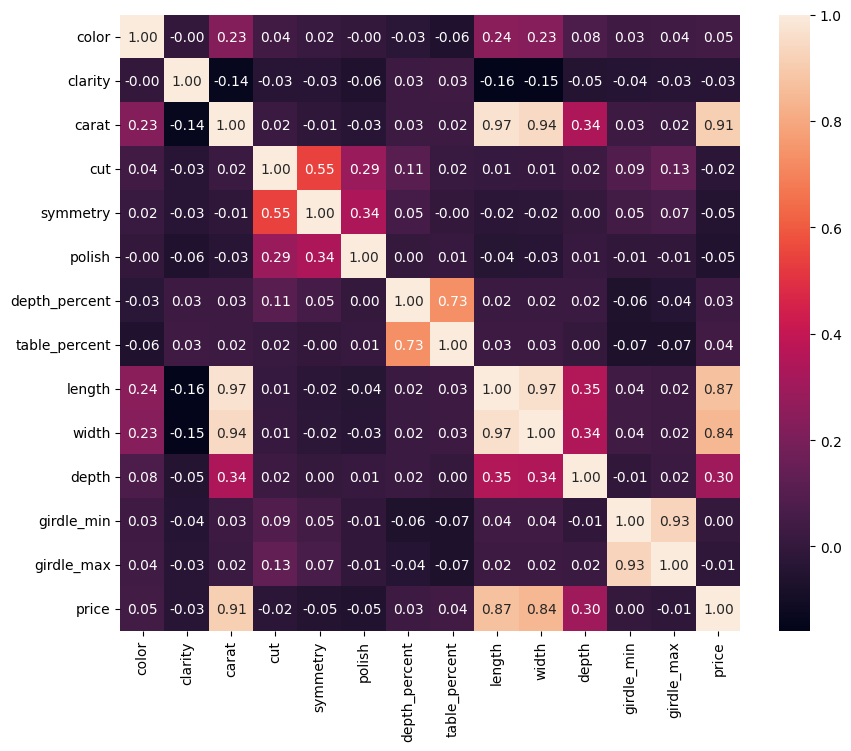

price            1.000000
carat            0.913479
length           0.869521
width            0.841887
depth            0.299696
polish           0.054928
color            0.047189
symmetry         0.047149
table_percent    0.042453
clarity          0.032342
depth_percent    0.025469
cut              0.024356
girdle_max       0.014062
girdle_min       0.000619
Name: price, dtype: float64


In [5]:
df = df_diamond.copy(deep = True)
cat_cols = df.select_dtypes(include=[object]).columns
df_encoded = df.copy()
for c in cat_cols:
    cat_series = df_encoded[c].astype('category')
    print(f"Column: {c}")
    for i, cat_value in enumerate(cat_series.cat.categories):
        print(f"  {cat_value} => {i}")
    df_encoded[c] = df_encoded[c].astype('category').cat.codes
corr = df_encoded.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()
target_corr = corr['price'].abs().sort_values(ascending=False)
print(target_corr)


# Q1.2

### If a numerical feature has high skewness, transformations like log or power transforms can make the distribution more symmetric and potentially improve model performance.

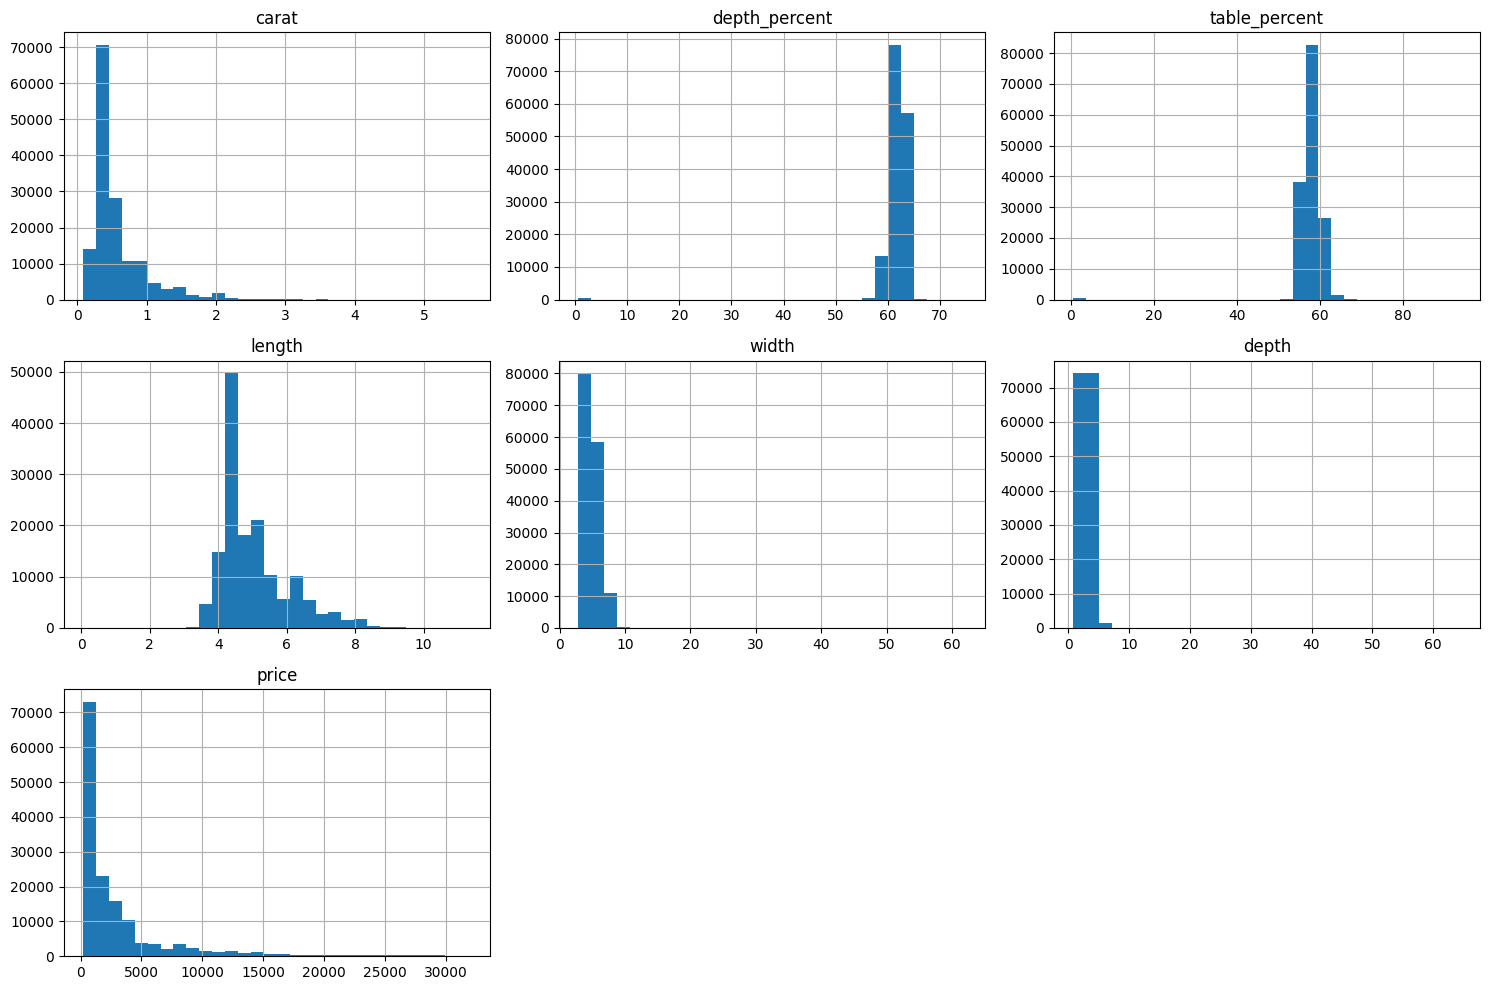

In [6]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

# Q1.3

### In this dataset, color (or any of the other categorical features) alone does not cleanly separate diamonds by price. Although some color categories (like M in this particular dataset) appear to have a slightly higher median price, there is a large amount of overlap across all colors. This indicates that while color may play a role in pricing, other factors (such as carat weight or cut) likely contribute more heavily to a diamond’s final price. Additionally, the count plot shows that colors E, F, and D occur most frequently, whereas M, L, and K are relatively rare, which may also influence the median price you see for each category. We can make similar assertions for the rest of the categorical features and these assertions are supported by the Pearson correlation plot. Another thing to note is that when you have many samples for a given category, the boxplot whiskers and outliers reflect a larger pool of points—so you might see many extreme values, but the box itself (median and quartiles) stabilizes with more data. In contrast, categories with fewer samples can show boxplots that look more spread out or skewed if just a few higher‑priced diamonds appear. Essentially, the boxplot’s shape and number of outliers can be influenced by how many samples each category contains: more frequent categories might show a dense cluster of median values with lots of outliers up above, whereas rarer categories might appear to have more or fewer outliers simply because the total sample is smaller.

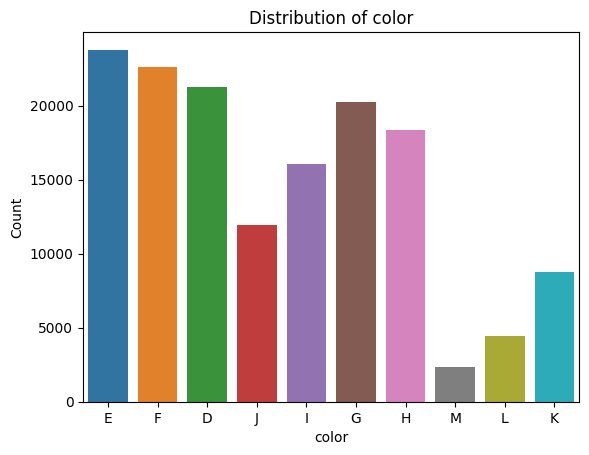

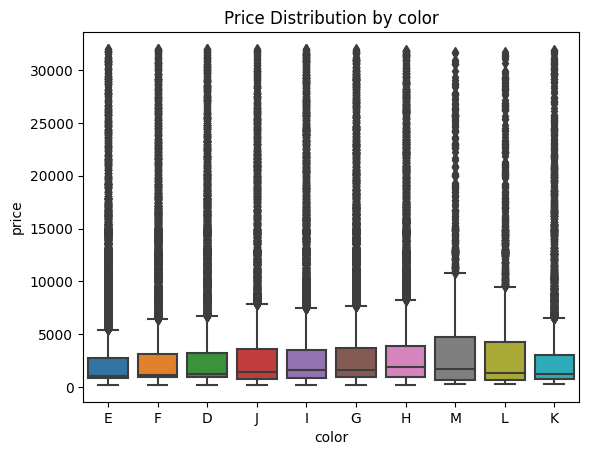

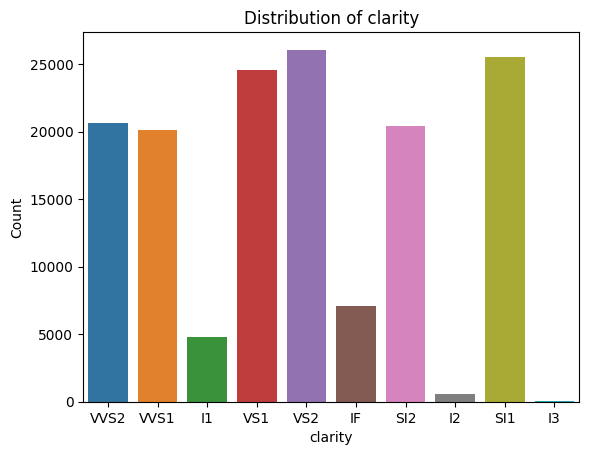

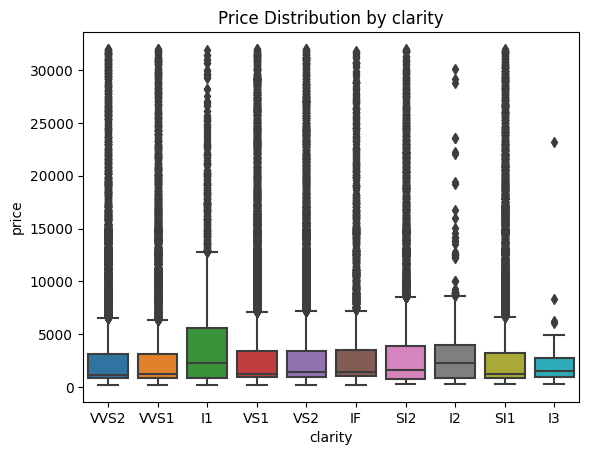

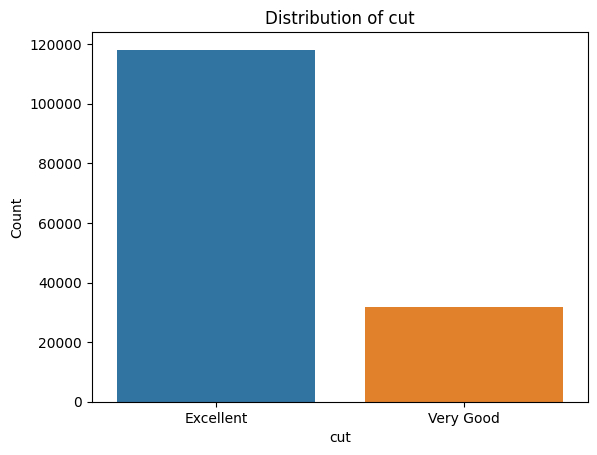

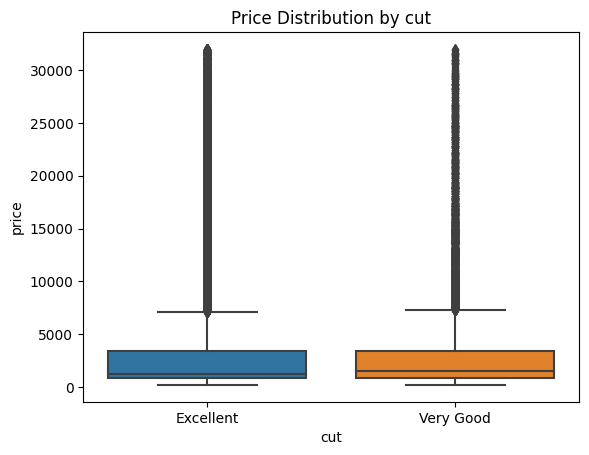

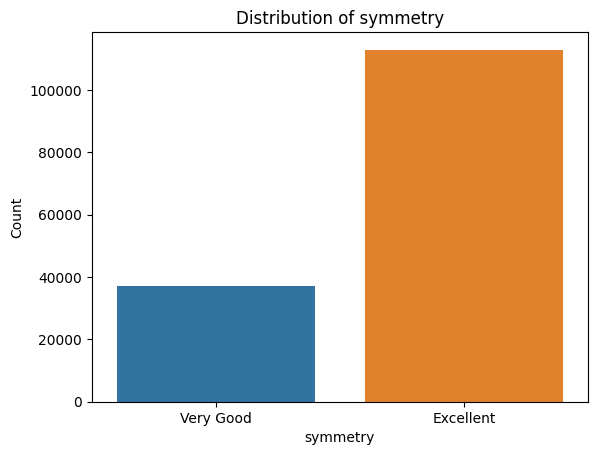

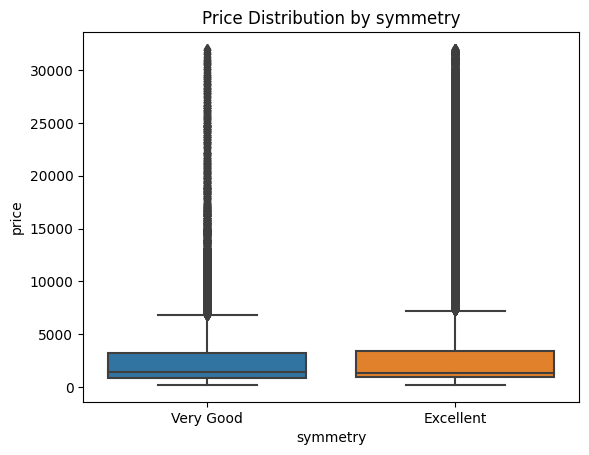

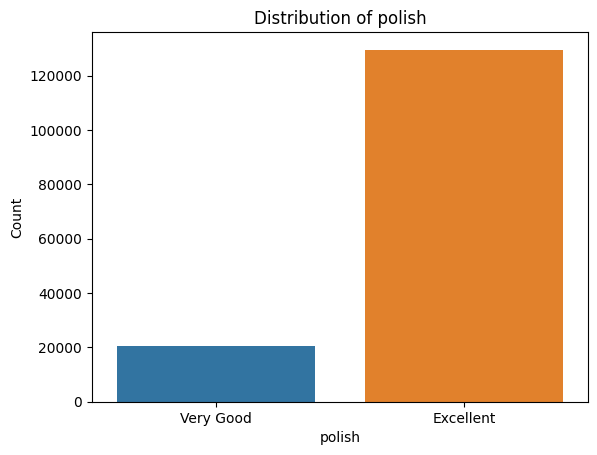

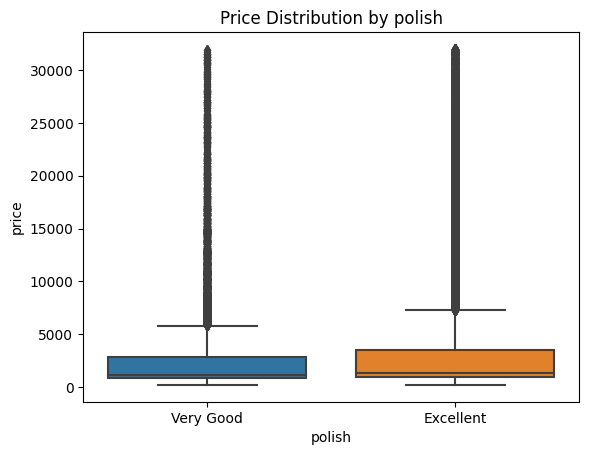

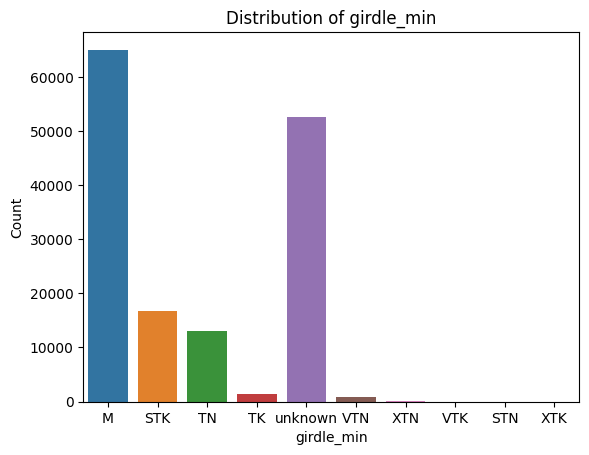

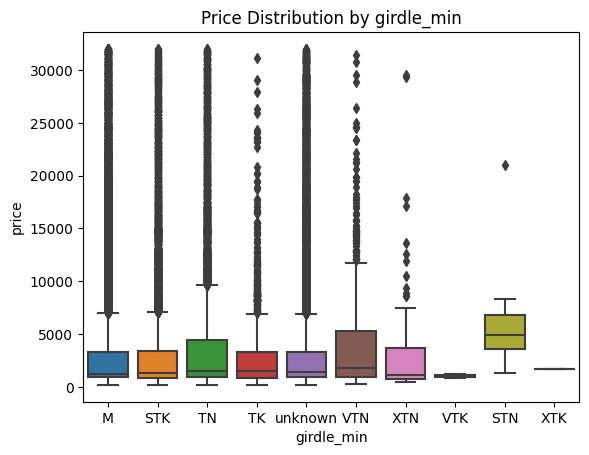

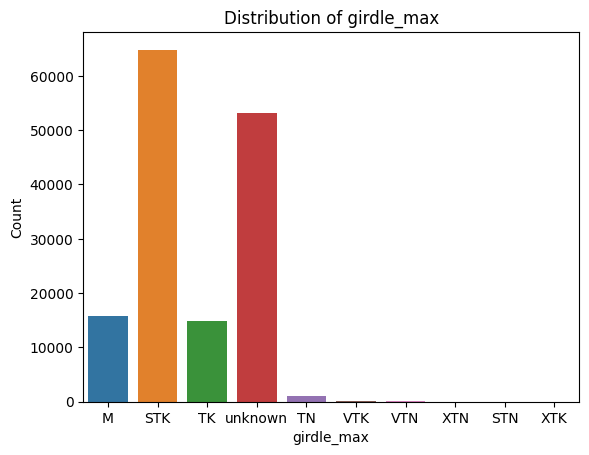

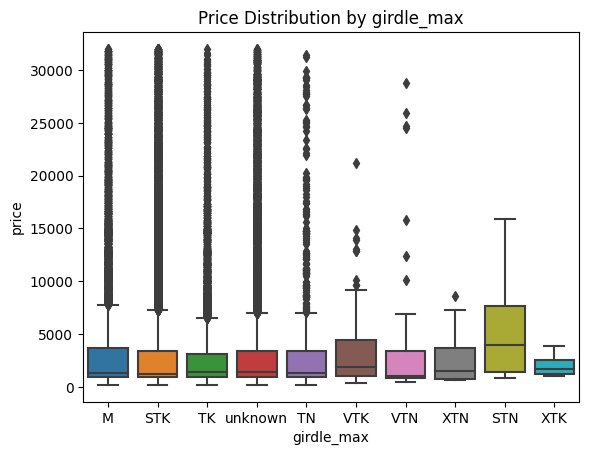

In [7]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns
for col in cat_cols:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Distribution of {col}")
    plt.show()
    plt.figure()
    sns.boxplot(x=col, y='price', data=df)
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(f'Price Distribution by {col}')
    plt.show()

# Q1.4

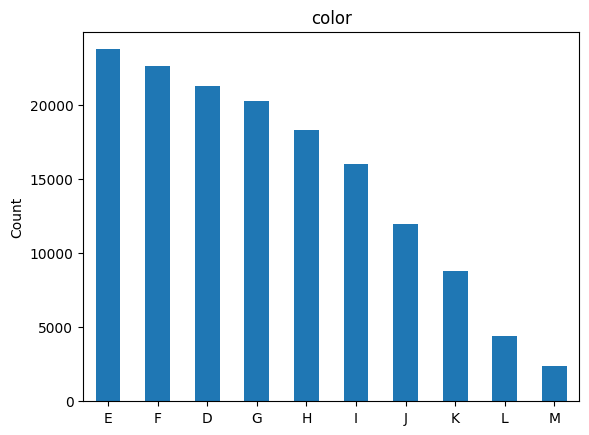

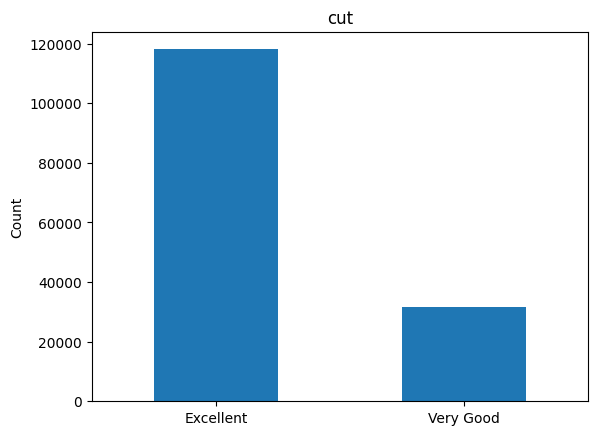

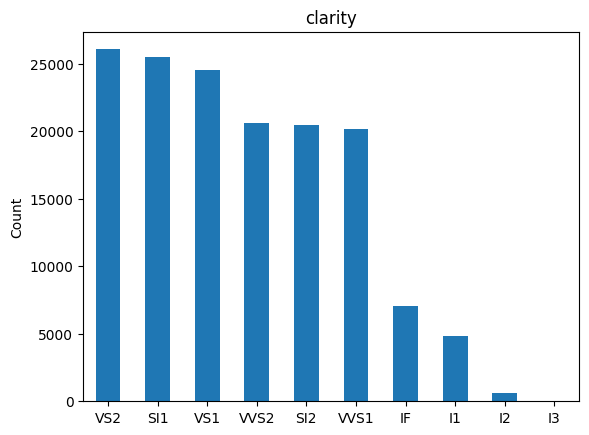

In [8]:
for c in ['color','cut','clarity']:
    plt.figure()
    df[c].value_counts().plot(kind='bar', rot=0)
    plt.title(c)
    plt.ylabel('Count')
    plt.show()

# Q2.1

In [9]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_cols = X_train.select_dtypes(include=[np.number]).columns
cat_cols = X_train.select_dtypes(exclude=[np.number]).columns
skew_vals = X_train[num_cols].skew().abs()
skewed_cols = skew_vals[skew_vals>1].index
not_skewed_cols = skew_vals[skew_vals<=1].index

ct = ColumnTransformer([
    ('skewed', Pipeline([
        ('pt', PowerTransformer(method='yeo-johnson')),
        ('scaler', StandardScaler())
    ]), skewed_cols),
    ('not_skewed', StandardScaler(), not_skewed_cols),
    ('cat', OrdinalEncoder(), cat_cols)
])

X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

final_feature_order = list(skewed_cols) + list(not_skewed_cols) + list(cat_cols)

df_X_train_transformed = pd.DataFrame(
    X_train_transformed, 
    columns=final_feature_order,
    index=X_train.index
)
df_X_test_transformed = pd.DataFrame(
    X_test_transformed, 
    columns=final_feature_order,
    index=X_test.index
)

print(df_X_train_transformed.head())
print(df_X_test_transformed.head())

          carat  depth_percent  table_percent    length     width     depth  \
80033  0.499997       0.337201       0.533632  0.378739  0.479349  0.497224   
82831  0.309385      -0.382080       2.158022  0.240202  0.352855  0.278989   
31549 -0.748439      -1.022153       0.048402 -0.645527 -0.643293 -0.798165   
94480  0.665310       0.413800      -1.253111  0.588470  0.680230  0.663513   
78520 -0.343379      -0.244816       0.533632 -0.325341 -0.273214 -0.311812   

       color  clarity  cut  symmetry  polish  girdle_min  girdle_max  
80033    7.0      4.0  0.0       0.0     0.0         0.0         1.0  
82831    2.0      0.0  1.0       1.0     0.0         9.0         9.0  
31549    3.0      4.0  0.0       0.0     0.0         9.0         9.0  
94480    5.0      5.0  0.0       0.0     0.0         1.0         1.0  
78520    4.0      8.0  0.0       0.0     0.0         1.0         1.0  
           carat  depth_percent  table_percent    length     width     depth  \
97395   0.309385   

# Q2.2

In [10]:
features = df_X_train_transformed.copy()  # place-holder; replace with your actual transformed DataFrame
labels = y_train

f_selector = SelectKBest(score_func=f_regression, k='all')
f_selector.fit(features, labels)

# Get the array of p-values
p_values = f_selector.pvalues_
scores = f_selector.scores_

print("P-values:")
for col, pval in zip(features.columns, p_values):
    print(f"{col}: {pval}")

significant_cols = features.columns[p_values < 0.05]
print("\nSignificant columns (p < 0.05):", list(significant_cols))

insignificant_cols = features.columns[p_values > 0.05]
print("\nSignificant columns (p > 0.05):", list(insignificant_cols))

sort_idx_f = np.argsort(scores)[::-1]
sorted_features = features.columns[sort_idx_f]
sorted_scores = scores[sort_idx_f]

print("\nFeatures sorted by F-score (descending):")
for feat, sc in zip(sorted_features, sorted_scores):
    print(f"{feat}: {sc}")

P-values:
carat: 0.0
depth_percent: 0.08393968481354751
table_percent: 9.180123965230636e-53
length: 0.0
width: 0.0
depth: 0.0
color: 1.66331166994504e-61
clarity: 5.248471167309298e-29
cut: 1.9166662162361677e-17
symmetry: 1.1019986311914066e-62
polish: 3.3359769404513235e-82
girdle_min: 0.6069452192139495
girdle_max: 2.1982383033643492e-06

Significant columns (p < 0.05): ['carat', 'table_percent', 'length', 'width', 'depth', 'color', 'clarity', 'cut', 'symmetry', 'polish', 'girdle_max']

Significant columns (p > 0.05): ['depth_percent', 'girdle_min']

Features sorted by F-score (descending):
length: 174625.5812686372
carat: 142332.53585752554
width: 134253.11375952832
depth: 133236.48970185267
polish: 369.41656661266137
symmetry: 279.56215500479993
color: 274.1405238338786
table_percent: 233.95468129317297
clarity: 125.00459655548059
cut: 72.25057207004846
girdle_max: 22.415685266753563
depth_percent: 2.986969637024106
girdle_min: 0.26464870236839033


In [11]:
X_train.shape

(119896, 13)

In [12]:
from tqdm import tqdm 
final_feature_order = list(skewed_cols) + list(not_skewed_cols) + list(cat_cols)

def partial_mutual_info_regression(
    X_arr, 
    y_arr, 
    n_splits=6, 
    subset_size=20000, 
    random_state=42, 
    n_neighbors=3
):
    rng = np.random.RandomState(random_state)
    scores_list = []
    for  _ in tqdm(range(n_splits)):
        idx_subset = rng.choice(
            X_arr.shape[0],
            size=min(subset_size, X_arr.shape[0]),
            replace=False
        )
        X_subset = X_arr[idx_subset]
        y_subset = y_arr[idx_subset]
        scores = mutual_info_regression(X_subset, y_subset, n_neighbors=n_neighbors)
        scores_list.append(scores)
    avg_scores = np.mean(scores_list, axis=0)
    return avg_scores

mi_scores = partial_mutual_info_regression(
    X_train_transformed,
    y_train.values.ravel(),
    n_splits=6,
    subset_size=20000,
    random_state=42,
    n_neighbors=3
)

feature_score_pairs = list(zip(final_feature_order, mi_scores))
feature_score_pairs_sorted = sorted(feature_score_pairs, key=lambda x: x[1], reverse=True)

df_mi_scores = pd.DataFrame(feature_score_pairs_sorted, columns=["Feature", "MI_Score"])
print(df_mi_scores)

100%|██████████| 6/6 [01:51<00:00, 18.61s/it]

          Feature  MI_Score
0           carat  1.234621
1           width  1.123060
2          length  1.113739
3           depth  1.087866
4         clarity  0.128670
5           color  0.119114
6   depth_percent  0.030298
7      girdle_max  0.027612
8             cut  0.022828
9        symmetry  0.022458
10     girdle_min  0.022043
11  table_percent  0.016364
12         polish  0.008546
